# Lab | Feature engineering

    In this lab, you will use learningSet.csv file which you have already cloned in the previous activities.

### Instructions

Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

    Check for null values in the numerical columns.
    Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
    Use appropriate EDA technique where ever necessary.


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('learningSet.csv')

/tmp/ipykernel_3003/3673836359.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


In [3]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [4]:
numerical = data.select_dtypes(np.number)
numerical

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,...,9602,NaN,NaN,25.000000,184568,0,0.0,0,1,12.0
95408,9601,1,5001,48.0,1.0,7.0,9.0,1,0.0,0.0,...,9603,NaN,NaN,20.000000,122706,0,0.0,1,1,2.0
95409,9501,1,3801,60.0,NaN,NaN,NaN,0,NaN,NaN,...,9410,9501.0,3.0,8.285714,189641,0,0.0,1,3,34.0
95410,8601,0,4005,58.0,NaN,7.0,NaN,0,NaN,NaN,...,8612,8704.0,4.0,12.146341,4693,1,18.0,1,4,11.0


#### Check for null values in the numerical columns

In [34]:
def get_columns_with_nan_values(data):
    nan_cols = []
    for col in data.columns:
        if data[col].isna().sum() > 0:
            nan_cols.append(col)
    return nan_cols

nan_cols = get_columns_with_nan_values(numerical)
numerical[nan_cols].isna().sum()

AGE         23665
NUMCHLD     83026
INCOME      21286
WEALTH1     44732
MBCRAFT     52854
            ...  
RAMNT_23    87553
RAMNT_24    77674
NEXTDATE     9973
TIMELAG      9973
CLUSTER2      132
Length: 91, dtype: int64

### Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

#### GEOCODE2

In [6]:
data['GEOCODE2'] = data['GEOCODE2'].apply(lambda gc: gc if gc in ['A','B','C','D'] else 'other')
data['GEOCODE2'].value_counts(dropna=False)

A        34484
B        28505
D        16580
C        15524
other      319
Name: GEOCODE2, dtype: int64

#### WEALTH1

In [7]:
data['WEALTH1'].value_counts(dropna=False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

As we can see there are to many nan values, so let's drop them...

In [8]:
data = data[data['WEALTH1'].notna()]

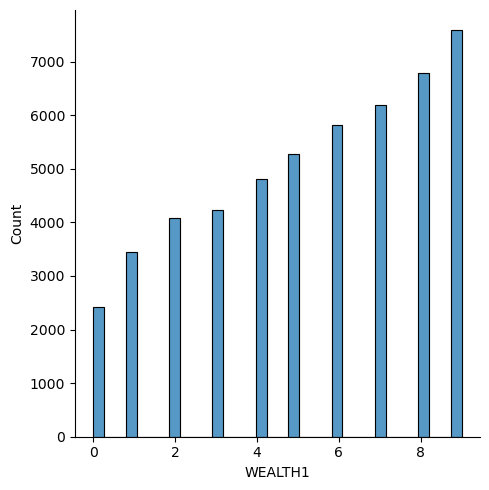

In [21]:
sns.displot(data['WEALTH1'])

#### ADI

In [9]:
data['ADI'].isna().sum()

32

Fill all nan values of column **ADI** with mode.

In [27]:
m = data[data['ADI'].notna()]['ADI'].mode()[0]
print(f'Mode = {m}')
data['ADI'] = data['ADI'].fillna(m)

Mode = 13.0


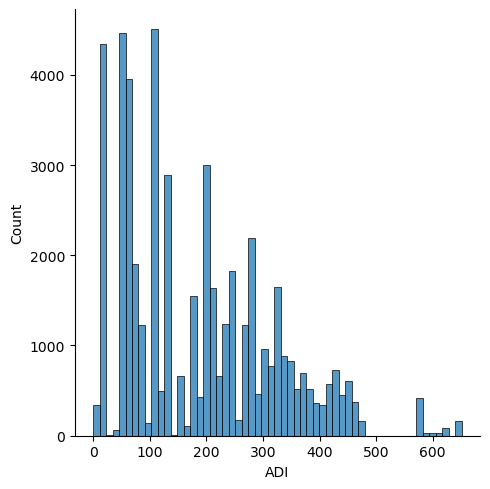

In [28]:
sns.displot(data['ADI'])

#### DMA

In [11]:
data['DMA'].isna().sum()

32

In [26]:
m = data[data['DMA'].notna()]['DMA'].mode()[0]
print(f'Mode = {m}')
data['DMA'] = data['DMA'].fillna(m)

Mode = 803.0


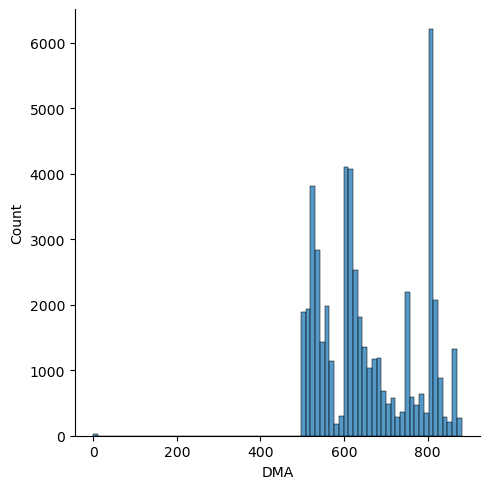

In [25]:
sns.displot(data['DMA'])

#### MSA

In [13]:
data['MSA'].isna().sum()

32

In [29]:
m = data[data['MSA'].notna()]['MSA'].mode()[0]
print(f'Mode = {m}')
data['MSA'] = data['MSA'].fillna(m)

Mode = 0.0


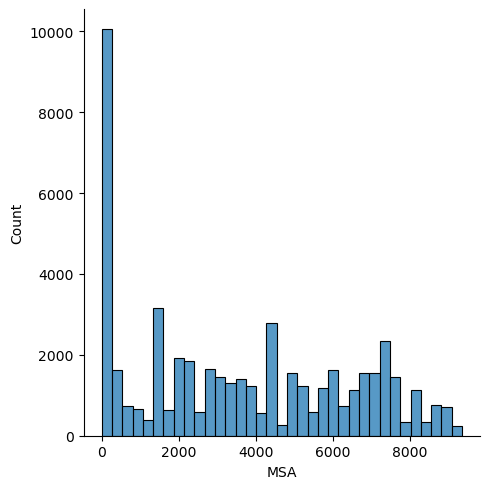

In [30]:
sns.displot(data['MSA'])